In [59]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek
import plotly.express as px


print("Modules are imported!")

Modules are imported!


In [61]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [62]:
data = pd.read_csv("/content/gdrive/MyDrive/capstone/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
data.shape

(284807, 31)

In [64]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [65]:
data.dropna(inplace=True)
data.shape

(284807, 31)

In [66]:
data = data.drop(axis = 1, columns = 'Time')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [67]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [68]:
data_fraud = data[data.Class == 1]
data_genuine = data[data.Class == 0]

data_fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [69]:
X = data.drop("Class", axis = 1)
y = data.Class

In [70]:
pca = PCA(2)
transformed_data = pca.fit_transform(X)
df = pd.DataFrame(transformed_data)
df['label'] = y
df

,0,1,label
0,1.322342,-0.389060,0
1,-1.269816,-0.078730,0
2,1.834317,1.342145,0
3,0.947021,-0.207852,0
4,0.937060,-1.141113,0
...,...,...,...
284802,9.981586,-10.374115,0
284803,0.538830,-0.639200,0
284804,-1.756413,0.934874,0
284805,0.056960,-0.688248,0


In [71]:
px.scatter(df, x = 0, y = 1, color = df.label.astype(str))

Output hidden; open in https://colab.research.google.com to view.

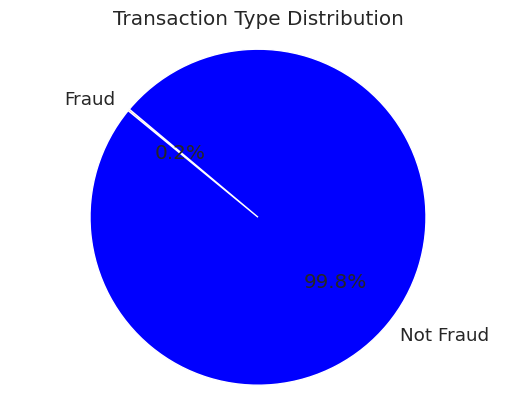

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dolandırıcılık ve normal işlemlerin oranlarını hesapla
ratios = [data.Class.mean(), 1 - data.Class.mean()]
labels = ['Fraud', 'Not Fraud']
colors = ['red', 'blue']
# Pasta grafiğini oluştur
plt.pie(ratios, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# Orta daireyi kapat
plt.axis('equal')
# Başlığı ekle
plt.title('Transaction Type Distribution')
# Grafiği göster
plt.show()

In [75]:
df.describe()

,0,1,label
count,2.848070e+05,2.848070e+05,284807.000000
mean,2.794201e-17,3.273206e-17,0.001727
std,1.984997e+00,1.775046e+00,0.041527
min,-2.302006e+00,-2.077621e+01,0.000000
25%,-1.291835e+00,-1.030870e+00,0.000000
50%,-1.038181e-01,1.276157e-02,0.000000
75%,7.478245e-01,7.761657e-01,0.000000
max,7.785609e+01,1.052147e+02,1.000000


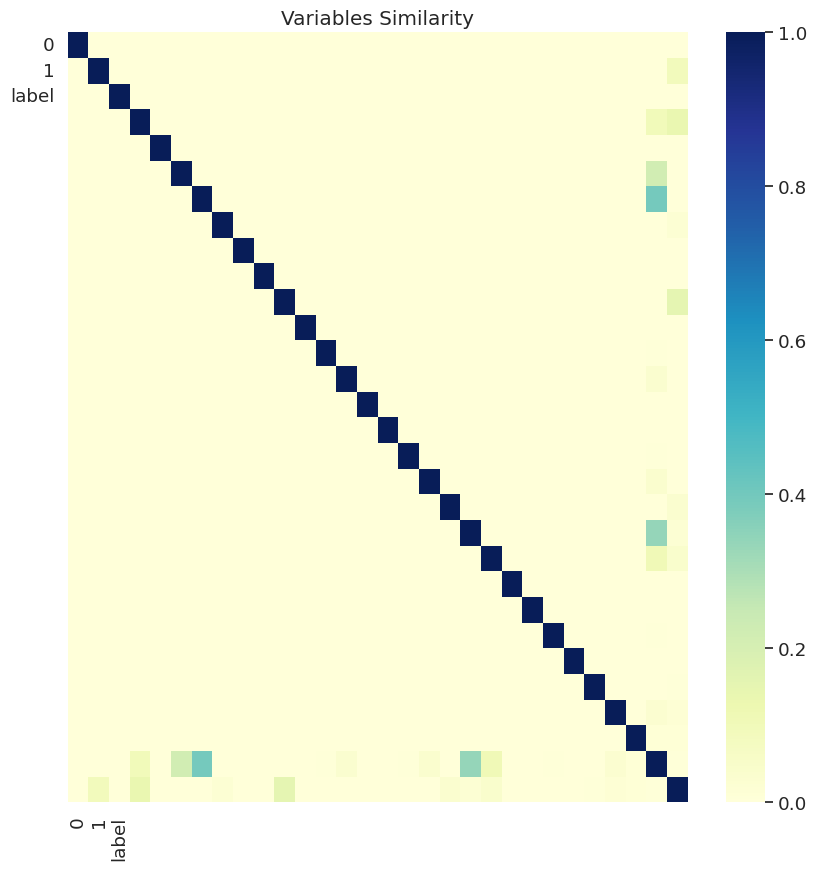

In [79]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,10))
def plot_similarity(labels, features, rotation):
    corr = features.corr()
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlGnBu")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Variables Similarity")

plot_similarity(df.columns, data, 90)

In [80]:
transaction_amount_threshold = 1000
amount_flag = ((data.Amount > transaction_amount_threshold).astype(int))
amount_flag.value_counts()

Amount
0    284807
Name: count, dtype: int64

In [82]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(amount_flag, data.Class)#confusion matrix olurşuturudk

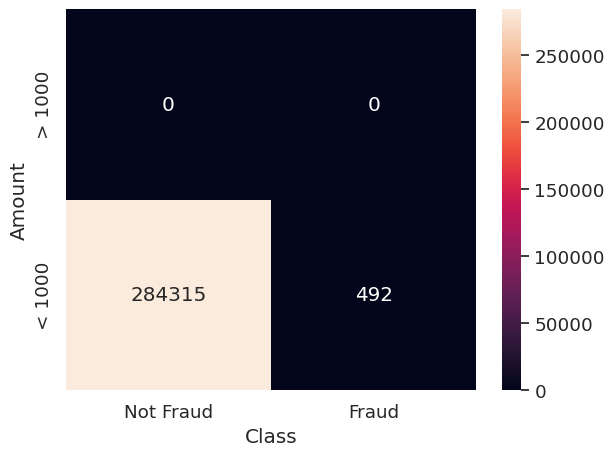

In [83]:
sns.heatmap(cm, annot=True, yticklabels=['< ' + str(transaction_amount_threshold),
                                        '> ' + str(transaction_amount_threshold)],
                            xticklabels=['Not Fraud', 'Fraud'], fmt='g')
yl = plt.ylabel("Amount")
xl = plt.xlabel("Class")
plt.ylim([0,2])
plt.tight_layout()

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [85]:
y_train.value_counts()

Class
0    199031
1       333
Name: count, dtype: int64

In [86]:
Counter(y_train)

Counter({0: 199031, 1: 333})

In [ ]:
sm = SMOTETomek(sampling_strategy=1)
X_train_ns, y_train_ns = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

In [ ]:

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_ns, y_train_ns)
y_pred_knn = knn_classifier.predict(X_test)
print("\nKNeighborsClassifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nKNeighborsClassifier Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNeighborsClassifier Accuracy Score:", accuracy_score(y_test, y_pred_knn))

In [ ]:
# Sınıf dağılımlarını hesapla
total_samples = len(y_train_ns)
fraud_samples = np.sum(y_train_ns == 1)
non_fraud_samples = np.sum(y_train_ns == 0)

# Yüzde olarak ifade et
fraud_percentage = (fraud_samples / total_samples) * 100
non_fraud_percentage = (non_fraud_samples / total_samples) * 100

# Çubuk grafik oluştur
plt.figure(figsize=(8, 6))
plt.bar(['Fraud', 'Non-Fraud'], [fraud_percentage, non_fraud_percentage], color=['red', 'blue'])
plt.ylabel('Percentage of Samples')
plt.title('Class Distribution in Training Data')
plt.show()

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
# Original dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0].iloc[:, 0], X_train[y_train == 0].iloc[:, 1], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X_train[y_train == 1].iloc[:, 0], X_train[y_train == 1].iloc[:, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.title('Original dataset')
plt.legend()
plt.show()

# Apply SMOTETomek
from imblearn.combine import SMOTETomek
sm = SMOTETomek(sampling_strategy=1)
X_train_ns, y_train_ns = sm.fit_resample(X_train, y_train)

# Resampled dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train_ns[y_train_ns == 0].iloc[:, 0], X_train_ns[y_train_ns == 0].iloc[:, 1], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X_train_ns[y_train_ns == 1].iloc[:, 0], X_train_ns[y_train_ns == 1].iloc[:, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.title('Resampled dataset')
plt.legend()
plt.show()